In [18]:
import pandas as pd
import numpy as np

# For modeling the stocks
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot, t
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

### Predicting the closing price stock price of APPLE inc:

### Checking Data

In [19]:
# Get the stock quote
#df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df = yf.download('AAPL', start='2022-06-06', end=datetime.now(), interval='5m')
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-06-06 09:30:00-04:00,147.029999,148.130005,147.029999,147.839996,147.839996,4579829
2022-06-06 09:35:00-04:00,147.850006,148.020004,147.360001,147.701706,147.701706,1619853
2022-06-06 09:40:00-04:00,147.699997,148.309998,147.570007,148.014999,148.014999,1808792
2022-06-06 09:45:00-04:00,148.029999,148.089996,147.149994,147.400696,147.400696,1313489
2022-06-06 09:50:00-04:00,147.410004,147.699997,147.220001,147.514999,147.514999,982901
...,...,...,...,...,...,...
2022-08-04 14:35:00-04:00,165.309998,165.320007,165.160995,165.239899,165.239899,210796
2022-08-04 14:40:00-04:00,165.240005,165.259995,165.014999,165.235001,165.235001,303939
2022-08-04 14:45:00-04:00,165.235001,165.380005,165.169998,165.324997,165.324997,259822


In [20]:
df['Return'] = df['Close'].pct_change()
df = df.fillna(0)
df

,Open,High,Low,Close,Adj Close,Volume,Return
Datetime,,,,,,,
2022-06-06 09:30:00-04:00,147.029999,148.130005,147.029999,147.839996,147.839996,4579829,0.000000
2022-06-06 09:35:00-04:00,147.850006,148.020004,147.360001,147.701706,147.701706,1619853,-0.000935
2022-06-06 09:40:00-04:00,147.699997,148.309998,147.570007,148.014999,148.014999,1808792,0.002121
2022-06-06 09:45:00-04:00,148.029999,148.089996,147.149994,147.400696,147.400696,1313489,-0.004150
2022-06-06 09:50:00-04:00,147.410004,147.699997,147.220001,147.514999,147.514999,982901,0.000775
...,...,...,...,...,...,...,...
2022-08-04 14:35:00-04:00,165.309998,165.320007,165.160995,165.239899,165.239899,210796,-0.000394
2022-08-04 14:40:00-04:00,165.240005,165.259995,165.014999,165.235001,165.235001,303939,-0.000030
2022-08-04 14:45:00-04:00,165.235001,165.380005,165.169998,165.324997,165.324997,259822,0.000545


In [21]:
low_low=[]

for row in range(len(df)):
    if df.iloc[row-1, 2] > df.iloc[row, 2]:
        low_low.append(0)
        
    elif (df.iloc[row-1, 2] < df.iloc[row, 2]):
        low_low.append(1)
        
    elif (df.iloc[row-1, 2] == df.iloc[row, 2]):
        low_low.append(-1)
        
low_low = np.array(low_low)        
low_low = np.transpose(low_low).reshape(-1,1)
df['Custom lows'] = low_low
df

,Open,High,Low,Close,Adj Close,Volume,Return,Custom lows
Datetime,,,,,,,,
2022-06-06 09:30:00-04:00,147.029999,148.130005,147.029999,147.839996,147.839996,4579829,0.000000,0
2022-06-06 09:35:00-04:00,147.850006,148.020004,147.360001,147.701706,147.701706,1619853,-0.000935,1
2022-06-06 09:40:00-04:00,147.699997,148.309998,147.570007,148.014999,148.014999,1808792,0.002121,1
2022-06-06 09:45:00-04:00,148.029999,148.089996,147.149994,147.400696,147.400696,1313489,-0.004150,0
2022-06-06 09:50:00-04:00,147.410004,147.699997,147.220001,147.514999,147.514999,982901,0.000775,1
...,...,...,...,...,...,...,...,...
2022-08-04 14:35:00-04:00,165.309998,165.320007,165.160995,165.239899,165.239899,210796,-0.000394,0
2022-08-04 14:40:00-04:00,165.240005,165.259995,165.014999,165.235001,165.235001,303939,-0.000030,0
2022-08-04 14:45:00-04:00,165.235001,165.380005,165.169998,165.324997,165.324997,259822,0.000545,1


In [22]:
high_high=[]

for row in range(len(df)):
    if df.iloc[row-1, 1] > df.iloc[row, 1]:
        high_high.append(0)
        
    elif (df.iloc[row-1, 1] < df.iloc[row, 1]):
        high_high.append(1)
        
    elif (df.iloc[row-1, 1] == df.iloc[row, 1]):
        high_high.append(-1)
        
high_high = np.array(high_high)        
high_high = np.transpose(high_high).reshape(-1,1)
df['Custom highs'] = high_high
df

,Open,High,Low,Close,Adj Close,Volume,Return,Custom lows,Custom highs
Datetime,,,,,,,,,
2022-06-06 09:30:00-04:00,147.029999,148.130005,147.029999,147.839996,147.839996,4579829,0.000000,0,0
2022-06-06 09:35:00-04:00,147.850006,148.020004,147.360001,147.701706,147.701706,1619853,-0.000935,1,0
2022-06-06 09:40:00-04:00,147.699997,148.309998,147.570007,148.014999,148.014999,1808792,0.002121,1,1
2022-06-06 09:45:00-04:00,148.029999,148.089996,147.149994,147.400696,147.400696,1313489,-0.004150,0,0
2022-06-06 09:50:00-04:00,147.410004,147.699997,147.220001,147.514999,147.514999,982901,0.000775,1,0
...,...,...,...,...,...,...,...,...,...
2022-08-04 14:35:00-04:00,165.309998,165.320007,165.160995,165.239899,165.239899,210796,-0.000394,0,0
2022-08-04 14:40:00-04:00,165.240005,165.259995,165.014999,165.235001,165.235001,303939,-0.000030,0,0
2022-08-04 14:45:00-04:00,165.235001,165.380005,165.169998,165.324997,165.324997,259822,0.000545,1,1


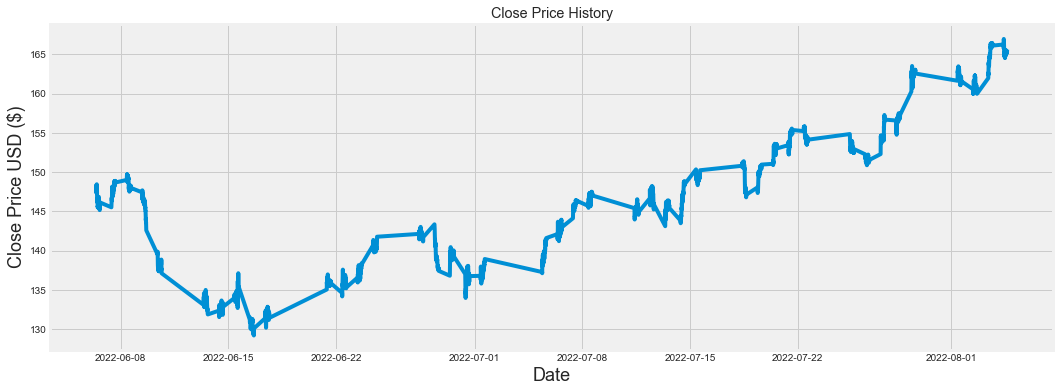

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
#plt.hist(df['Volume']);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

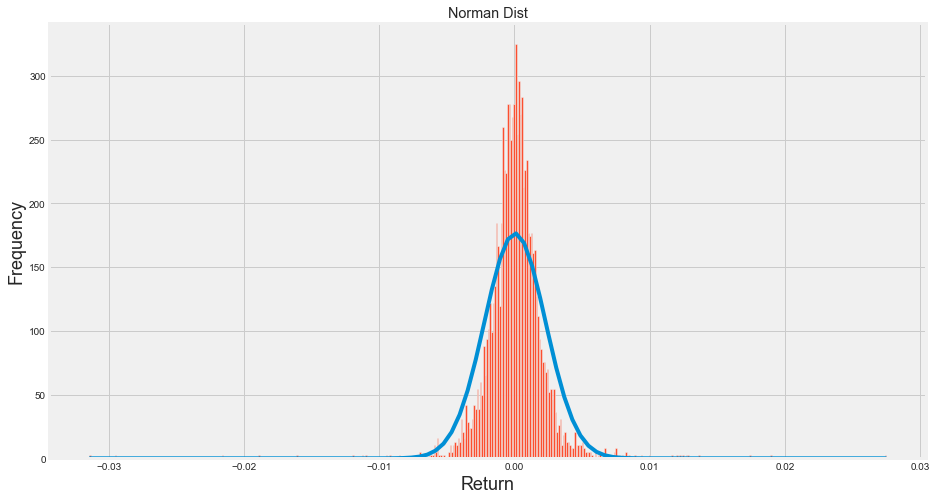

In [24]:
x_list = np.linspace(
                    df['Return'].min(),
                    df['Return'].max(),
                    100
                    )

y_list = norm.pdf(x_list, loc=df['Return'].mean(), scale=df['Return'].std())

plt.figure(figsize=(14,8))
plt.title('Norman Dist')
plt.xlabel('Return', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.plot(x_list,y_list);
plt.hist(df['Return'], bins=500,density=True);

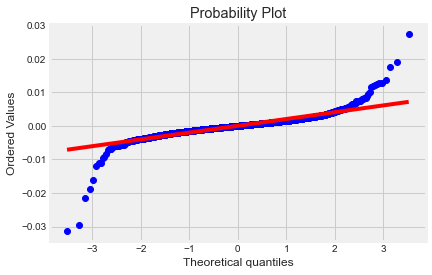

In [25]:
probplot(df['Return'],dist='norm',fit= True,plot=plt);

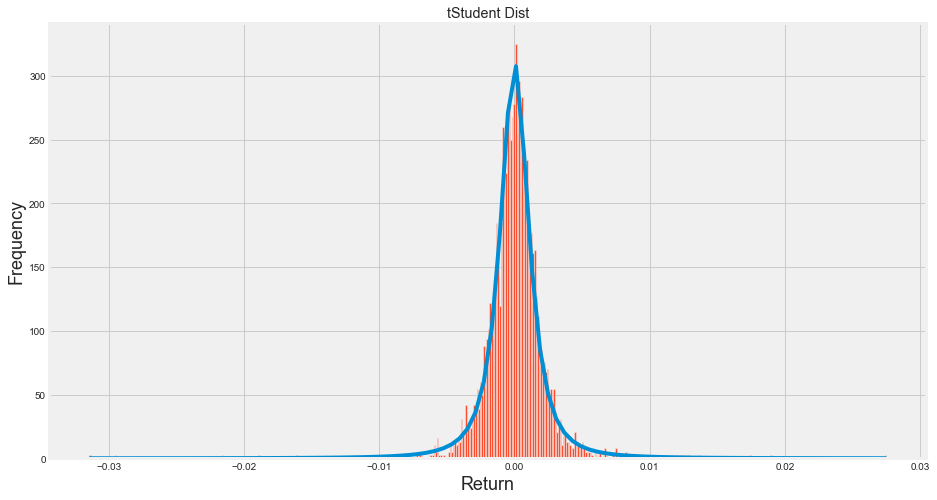

In [26]:
x_list = np.linspace(
                    df['Return'].min(),
                    df['Return'].max(),
                    100
                    )

params = t.fit(df['Return'].dropna())
degree_of_freedom, loc, scale = params

y_list = t.pdf(x_list, degree_of_freedom, loc, scale)

plt.figure(figsize=(14,8))
plt.title('tStudent Dist')
plt.xlabel('Return', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.plot(x_list,y_list);
plt.hist(df['Return'], bins=500,density=True);

### Proccessing data

In [27]:
# featurs list
features = ['Return']
feature_size = len(features)
feature_size

1

In [28]:
# Create a new dataframe with only the 'Close' and 'volume' column 
data = df.filter(features)
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on (95% of total data)
training_data_len = int(np.ceil(len(dataset) * 0.95 ))

training_data_len

3101

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = dataset[0:training_data_len, :]

# Normolize train data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_train_data.shape

(3101, 1)

In [30]:
scaled_train_data.mean(), scaled_train_data.std()

(0.5339889770392334, 0.0387944677620982)

In [31]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(scaled_train_data)):
    x_train.append(scaled_train_data[i-60:i, :]) #60 days for test data
    y_train.append(scaled_train_data[i, :])
    if i<= 61:
        #print(x_train)
        #print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], feature_size))
x_train.shape

(3041, 60, 1)

In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = dataset[training_data_len - 60: , :]

#
test_data = scaler.transform(test_data)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
#print(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], feature_size))
x_test.shape

(163, 60, 1)

### Callbacks

In [33]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint('model_best_loss.h5',
                                                            monitor='loss',
                                                            save_best_only=True)

early_stopping_callback = keras.callbacks.EarlyStopping(patience=5,
                              restore_best_weights=True,
                              monitor='loss'
                              )

### Create Model

In [34]:
# Build the LSTM model
model = Sequential(name='my_model')
model.add(LSTM(200, return_sequences=True, input_shape = (x_train.shape[1], feature_size)))
model.add(LSTM(100, return_sequences=True, dropout=0.1))
model.add(LSTM(50, return_sequences=False, dropout=0.1))
model.add(Dense(feature_size, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           120400    
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 312,251
Trainable params: 312,251
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Train the model
fit_history = model.fit(x_train,
                        y_train,
                        batch_size=2,
                        epochs=10,
                        callbacks=[model_checkpoint_callback, early_stopping_callback])

Epoch 1/10
1521/1521 [==============================] - 40s 26ms/step - loss: 0.0017
Epoch 2/10
1521/1521 [==============================] - 41s 27ms/step - loss: 0.0017
Epoch 3/10
1521/1521 [==============================] - 41s 27ms/step - loss: 0.0016
Epoch 4/10
1521/1521 [==============================] - 40s 27ms/step - loss: 0.0016
Epoch 5/10
1521/1521 [==============================] - 40s 26ms/step - loss: 0.0016
Epoch 6/10
1521/1521 [==============================] - 40s 27ms/step - loss: 0.0016
Epoch 7/10
1521/1521 [==============================] - 40s 26ms/step - loss: 0.0016
Epoch 8/10
1521/1521 [==============================] - 40s 26ms/step - loss: 0.0016
Epoch 9/10
1521/1521 [==============================] - 41s 27ms/step - loss: 0.0016
Epoch 10/10
1521/1521 [==============================] - 41s 27ms/step - loss: 0.0016


In [37]:
# Save the trained model
model.save('my_model.h5')

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model('model_best_loss.h5')
model = reconstructed_model
model.summary()


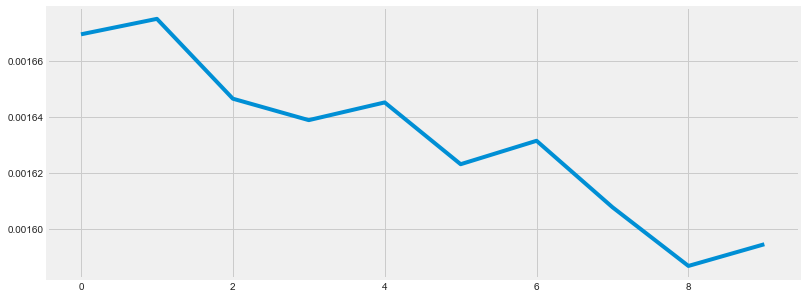

In [38]:
#Draw loss chart
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fit_history.history['loss'])

In [39]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 15ms/step
(163, 1)


0.0017904027569425104

In [40]:
# Predict the data
train = data[:training_data_len]
valid = data[training_data_len:]

In [43]:

# Insert Predictions in to the table
#valid.insert(1,'Close Prediction', predictions[:,0])
#valid.insert(3,'Volume Prediction', predictions[:,0])
valid.insert(1,'Return Prediction', predictions[:,0])

# Drop custom columns
#valid = valid.drop(columns=['Custom lows','Custom highs'])

In [44]:
# Show the valid and predicted prices
valid

,Return,Return Prediction
Datetime,,
2022-08-02 14:25:00-04:00,0.000248,-0.000446
2022-08-02 14:30:00-04:00,0.001429,-0.000446
2022-08-02 14:35:00-04:00,-0.001638,-0.000446
2022-08-02 14:40:00-04:00,0.000336,-0.000447
2022-08-02 14:45:00-04:00,0.000714,-0.000446
...,...,...
2022-08-04 14:35:00-04:00,-0.000394,-0.000447
2022-08-04 14:40:00-04:00,-0.000030,-0.000447
2022-08-04 14:45:00-04:00,0.000545,-0.000447


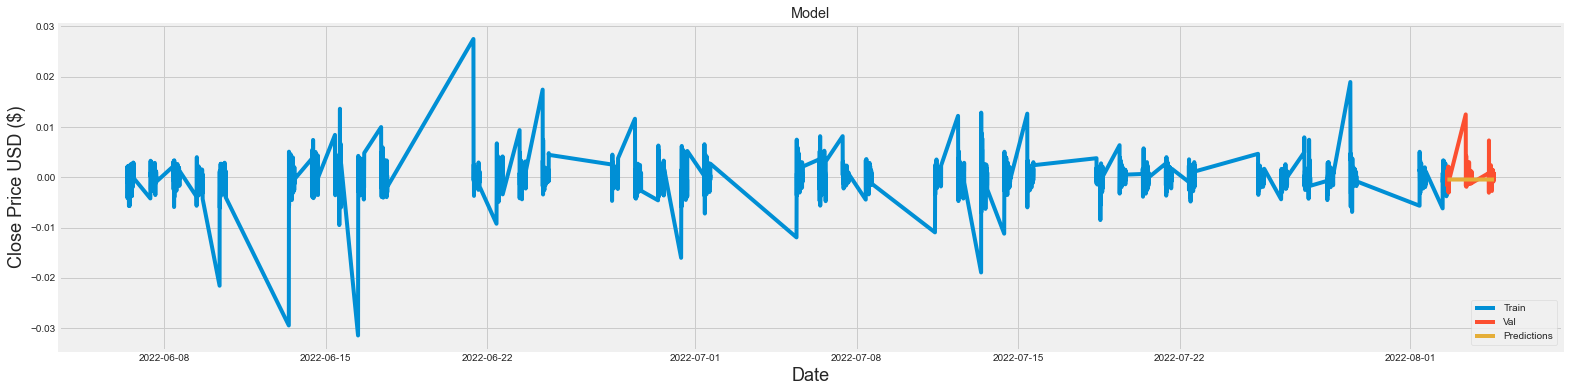

In [45]:
# Visualize the data
plt.figure(figsize=(24,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Return'])
plt.plot(valid[['Return', 'Return Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()